<a href="https://colab.research.google.com/github/syuan0525/project-team/blob/main/Xception_scooters1120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow 
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [30]:
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [31]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
s2 = glob.glob("./嚴選資料集/GOGORO_S2_裁/*") 

gp = glob.glob("./嚴選資料集/KYMCO_GP_125_裁/*") 

krv = glob.glob("./嚴選資料集/KYMCO_KRV_裁/*")

fiddle = glob.glob("./嚴選資料集/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./嚴選資料集/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./嚴選資料集/SYM_活力_125_裁/*")

famous = glob.glob("./嚴選資料集/KYMCO_新名流125_裁/*")

drg = glob.glob("./嚴選資料集/SYM_DRG_裁/*") 

duke = glob.glob("./嚴選資料集/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./嚴選資料集/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./嚴選資料集/YAMAHA_六代勁戰_125_裁/*")

force = glob.glob("./嚴選資料集/YAMAHA_FORCE_裁/*")

viva = glob.glob("./嚴選資料集/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("./嚴選資料集/GOGORO_S3_裁/*")

like = glob.glob("./嚴選資料集/KYMCO_LIKE_125_裁/*")

many = glob.glob("./嚴選資料集/KYMCO_MANY_125_裁/*")

bws = glob.glob("./嚴選資料集/YAMAHA_BWS_125_裁/*")

sl = glob.glob("./嚴選資料集/SYM_JET_SL_125_裁/*")

axiz = glob.glob("./嚴選資料集/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("./嚴選資料集/YAMAHA_JOG_125_裁/*")

In [32]:
print(len(trans))

20


In [33]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
df

,path,ans
0,./嚴選資料集/GOGORO_S2_裁/0.jpg,0
1,./嚴選資料集/GOGORO_S2_裁/1.jpg,0
2,./嚴選資料集/GOGORO_S2_裁/3.jpg,0
3,./嚴選資料集/GOGORO_S2_裁/5.jpg,0
4,./嚴選資料集/GOGORO_S2_裁/6.jpg,0
...,...,...
8101,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_5960.JPEG,19
8102,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_5961.JPEG,19
8103,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_5962.JPEG,19
8104,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_5963.JPEG,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[321 574 336 790 316 477 618 377 506 315 788 358 182 314 276 354 269 212
 511 212]


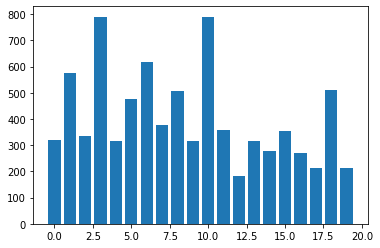

In [34]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


./嚴選資料集/SYM_JET_SR_125_裁/126690.jpg
[[[ 0.8039216   0.8039216   0.70980394]
  [ 0.81960785  0.81960785  0.7176471 ]
  [ 0.7882353   0.8117647   0.7254902 ]
  ...
  [-0.4352941  -0.46666664 -0.44313723]
  [-0.36470586 -0.42745095 -0.3960784 ]
  [-0.38039213 -0.44313723 -0.40392154]]

 [[-0.25490195 -0.2235294  -0.2862745 ]
  [-0.23921567 -0.20784312 -0.27058822]
  [-0.27058822 -0.23137254 -0.29411763]
  ...
  [-0.35686272 -0.4352941  -0.40392154]
  [-0.3333333  -0.41960782 -0.3960784 ]
  [-0.3490196  -0.4352941  -0.41176468]]

 [[-0.6862745  -0.69411767 -0.7254902 ]
  [-0.42745095 -0.47450978 -0.52156866]
  [-0.24705881 -0.3333333  -0.40392154]
  ...
  [-0.17647058 -0.3098039  -0.2862745 ]
  [-0.15294117 -0.3490196  -0.3333333 ]
  [-0.15294117 -0.3490196  -0.34117645]]

 ...

 [[ 0.13725495  0.04313731 -0.09019607]
  [ 0.23921573  0.14509809  0.01176476]
  [ 0.13725495  0.05098045 -0.09803921]
  ...
  [-0.38039213 -0.38823527 -0.3490196 ]
  [-0.38823527 -0.3960784  -0.35686272]
  [-0.39

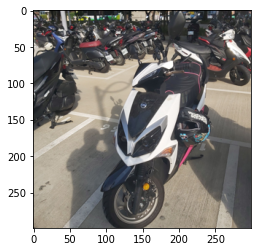

In [35]:
p = df["path"]

idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
# idx
path = p[idx]
# print(path.shape)

# img = cv2.imread(path)
# plt.imshow(img[:, :, ::-1])

img = Image.open(path).resize((299, 299)).convert("RGB")
img_np = np.array(img)
print(path)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)
# print(img)

In [36]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [37]:
base_model = Xception(
    include_top=False, weights='imagenet', input_shape=(299, 299, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [38]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

In [39]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [40]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((299, 299)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[ 0.20784318  0.3411765  -0.03529412]
   [ 0.254902    0.38823533 -0.01960784]
   [ 0.27058828  0.427451    0.02745104]
   ...
   [-0.64705884 -0.67058825 -0.70980394]
   [-0.5686275  -0.56078434 -0.654902  ]
   [-0.44313723 -0.4352941  -0.6156863 ]]

  [[ 0.254902    0.38823533  0.04313731]
   [ 0.254902    0.38823533  0.0196079 ]
   [ 0.22352946  0.38823533  0.02745104]
   ...
   [-0.60784316 -0.6313726  -0.67058825]
   [-0.54509807 -0.5686275  -0.6156863 ]
   [-0.60784316 -0.6313726  -0.6784314 ]]

  [[ 0.17647064  0.3176471  -0.01176471]
   [ 0.28627455  0.41960788  0.11372554]
   [ 0.07450986  0.254902   -0.05882353]
   ...
   [-0.56078434 -0.5921569  -0.6156863 ]
   [-0.5764706  -0.6        -0.6313726 ]
   [-0.58431375 -0.62352943 -0.64705884]]

  ...

  [[ 0.1686275   0.15294123  0.12156868]
   [ 0.24705887  0.20784318  0.18431377]
   [ 0.21568632  0.18431377  0.16078436]
   ...
   [ 0.3411765   0.33333337  0.2941177 ]
   [ 0.30196083  0.26274514  0.17647064]
   [ 0.1686275  

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7295,)
(811,)
(7295,)
(811,)


In [42]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=12, restore_best_weights=True),
             ModelCheckpoint("/content/1118.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=300,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/300
30/30 [==============================] - ETA: 0s - loss: 2.8682 - acc: 0.1333

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


30/30 [==============================] - 86s 3s/step - loss: 2.8682 - acc: 0.1333 - val_loss: 2.7663 - val_acc: 0.1500
Epoch 2/300
30/30 [==============================] - 83s 3s/step - loss: 2.6502 - acc: 0.2267 - val_loss: 2.5201 - val_acc: 0.2667
Epoch 3/300
30/30 [==============================] - 74s 3s/step - loss: 2.4932 - acc: 0.3033 - val_loss: 2.3343 - val_acc: 0.2667
Epoch 4/300
30/30 [==============================] - 78s 3s/step - loss: 2.3966 - acc: 0.3017 - val_loss: 2.3665 - val_acc: 0.2833
Epoch 5/300
30/30 [==============================] - 76s 3s/step - loss: 2.2023 - acc: 0.3650 - val_loss: 2.1524 - val_acc: 0.3833
Epoch 6/300
30/30 [==============================] - 75s 3s/step - loss: 2.1471 - acc: 0.3817 - val_loss: 2.1794 - val_acc: 0.4000
Epoch 7/300
30/30 [==============================] - 76s 3s/step - loss: 2.0622 - acc: 0.4117 - val_loss: 2.0798 - val_acc: 0.3500
Epoch 8/300
30/30 [==============================] - 72s 2s/step - loss: 2.0258 - acc: 0.4467 -

# Grad-CAM

In [44]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [45]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [46]:
model = load_model("/content/1118.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

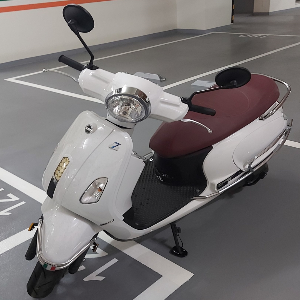

In [47]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(299,299))
cv2_imshow(cv2.resize(cv2.imread(path), (300,300)))

In [48]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# print(decode_predictions(preds))

In [49]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("Conv_1_bn")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-4208c5b9fa22>", line 2, in <module>
    last_conv_layer = model.get_layer("Conv_1_bn")
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 2631, in get_layer
    raise ValueError(f'No such layer: {name}. Existing layers are '
ValueError: No such layer: Conv_1_bn. Existing layers are [<keras.engine.input_layer.InputLayer object at 0x7fee700e3890>, <keras.layers.convolutional.Conv2D object at 0x7fee700d1a10>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fee700d1890>, <keras.layers.core.activation.Activation object at 0x7ff18771d190>, <keras.layers.convolutional.Conv2D object at 0x7fee700e3210>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff0bf61b7d0>, <keras.layers.core.activ

ValueError: ignored

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [ ]:
img = cv2.imread(path)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img

In [ ]:
cv2_imshow(cv2.resize(cv2.imread(path), (320,320)))
cv2_imshow(cv2.resize(img, (320,320)))

In [50]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((299, 299)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)

pre = pre.argmax(axis=1)

In [51]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(20)],
        columns=["{}(預測)".format(trans[i]) for i in range(20)])

,s2(預測),gp(預測),krv(預測),fiddle(預測),sr(預測),vivo(預測),famous(預測),drg(預測),duke(預測),limi(預測),gryphus6(預測),force(預測),viva(預測),s3(預測),like(預測),many(預測),bws(預測),sl(預測),axiz(預測),jog(預測)
s2(正確),41,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0
gp(正確),0,34,0,0,0,5,6,0,5,0,1,0,2,1,0,2,0,0,4,2
krv(正確),0,0,19,0,0,1,0,0,1,0,2,1,0,0,0,0,0,0,0,0
fiddle(正確),0,0,0,85,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
sr(正確),0,2,0,0,5,1,1,6,2,1,2,1,0,2,0,0,1,1,2,1
vivo(正確),1,3,0,0,1,33,2,0,9,1,7,1,0,0,0,0,0,0,1,0
famous(正確),0,3,0,1,2,0,44,2,2,1,1,0,0,0,0,0,0,0,3,0
drg(正確),0,1,3,0,0,0,0,22,1,1,4,0,0,0,0,0,0,0,0,0
duke(正確),0,3,1,0,1,4,1,0,25,1,2,1,0,0,0,0,0,0,1,0
limi(正確),0,1,2,0,0,0,1,1,0,20,4,0,0,0,0,0,0,1,0,1


In [ ]:

import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((299, 299)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 299, 299, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)